<a href="https://colab.research.google.com/github/hanabero/sample_projects/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **description of variables**


About this dataset
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

  Value 1: typical angina
  Value 2: atypical angina
  Value 3: non-anginal pain
  Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack


---



# **Questions?**
1. Does age affect a heart attack?
2. Does the type of pain in your breast affect the heart attack?
3. Does high blood pressure affects a heart attack?
4. Does choresterl has an effect on a heart attack?



Spis treści:
1. [import libraries](#0)
2. [EDA](#1)
3. [Categorical data](#2)



### <a name='0'></a>import libraries




In [300]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

sns.set

<function seaborn.rcmod.set>

In [3]:
raw_data1 = pd.read_csv('/content/drive/MyDrive/Python/Datasets/heart.csv')
raw_data2 = pd.read_csv('/content/drive/MyDrive/Python/Datasets/o2Saturation.csv')

In [4]:
df = raw_data1

In [5]:
df.shape

(303, 14)

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
df = df.drop_duplicates(keep='first')
print(f'The Data-set contain {df.shape[0]} rows and {df.shape[1]} columns. 1 row was dealated as a duplicate')

The Data-set contain 302 rows and 14 columns. 1 row was dealated as a duplicate


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [22]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
con_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
target_col = ['output']

print("The categorial cols are :", cat_cols)
print("The continous cols are :", con_cols)
print("The target cols are :", target_col)


The categorial cols are : ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
The continous cols are : ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target cols are : ['output']


### <a name='1'></a> EDA

1    206
0     96
Name: sex, dtype: int64


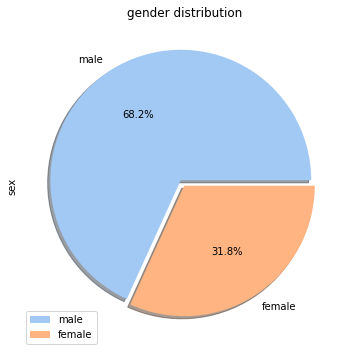

In [159]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(8,6))
df.sex.value_counts().plot(kind='pie',labels=['male','female']
                           ,explode=[0.05,0], shadow=True, autopct='%1.1f%%',
                           colors=colors)
plt.legend()
plt.title('gender distribution')
print(df.sex.value_counts())

### <a name='2'></a> Categorical data


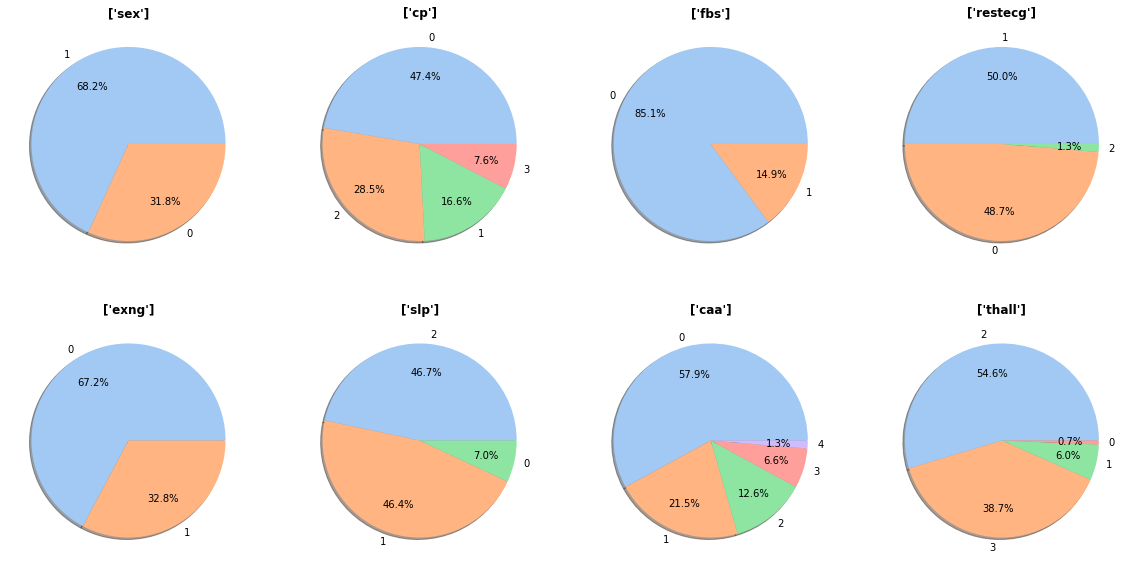

In [149]:
colors = sns.color_palette('pastel')
fig = plt.figure(figsize=(20,10))
c = 1

for i in cat_cols:
  plt.subplot(2,4,c)
  df[i].value_counts().plot(kind='pie',shadow=True, autopct='%1.1f%%',
                            colors=colors, pctdistance=.7, ylabel='')
  c+=1
  plt.title([i],fontweight="bold")
plt.show()


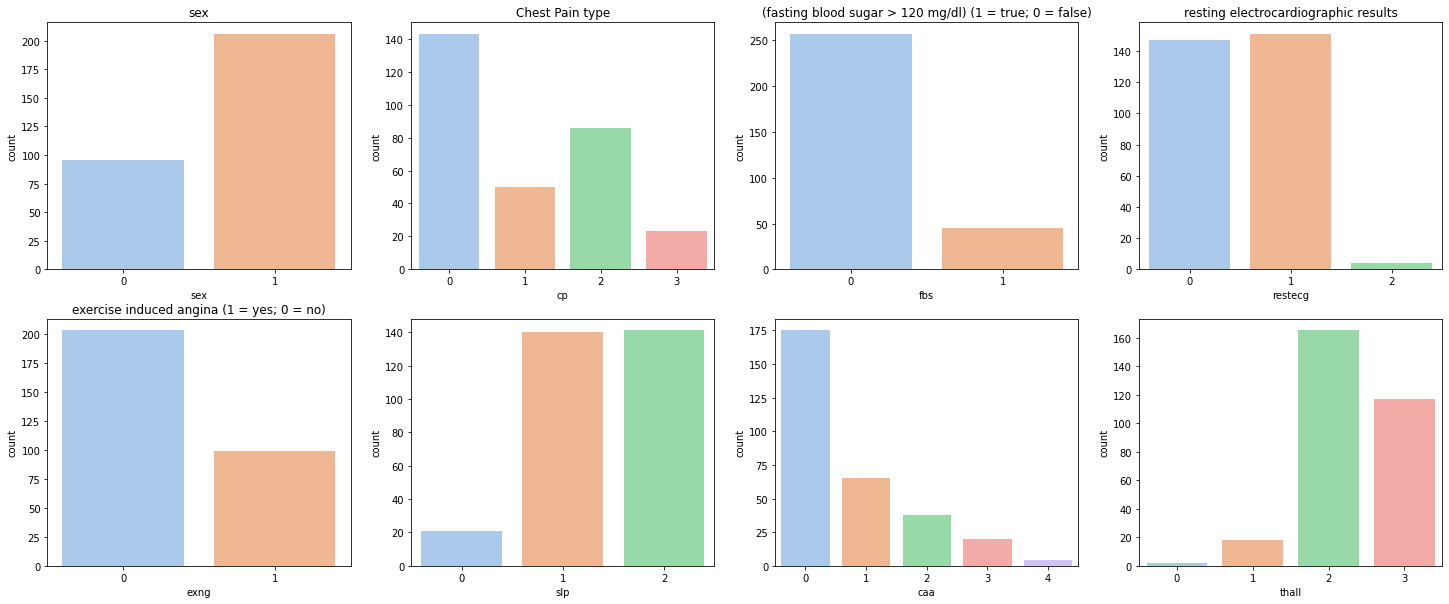

In [163]:
fig, axes = plt.subplots(2, 4, figsize = (25,10), sharey=False)
#sex
sns.countplot(ax=axes[0,0], data=df, x='sex', palette='pastel')
axes[0,0].set_title('sex')

#cp
sns.countplot(ax=axes[0,1], data=df, x='cp', palette='pastel')
axes[0,1].set_title('Chest Pain type')

#fbs
sns.countplot(ax=axes[0,2], data=df, x='fbs', palette='pastel')
axes[0,2].set_title('(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)')

#restecg
sns.countplot(ax=axes[0,3], data=df, x='restecg', palette='pastel')
axes[0,3].set_title('resting electrocardiographic results')

#exng
sns.countplot(ax=axes[1,0], data=df, x='exng', palette='pastel')
axes[1,0].set_title('exercise induced angina (1 = yes; 0 = no)')

#slp
sns.countplot(ax=axes[1,1], data=df, x='slp', palette='pastel')

#caa
sns.countplot(ax=axes[1,2], data=df, x='caa', palette='pastel')

#thall
sns.countplot(ax=axes[1,3], data=df, x='thall', palette='pastel')


### <a name='3'></a> Continous data

In [200]:
con_cols

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

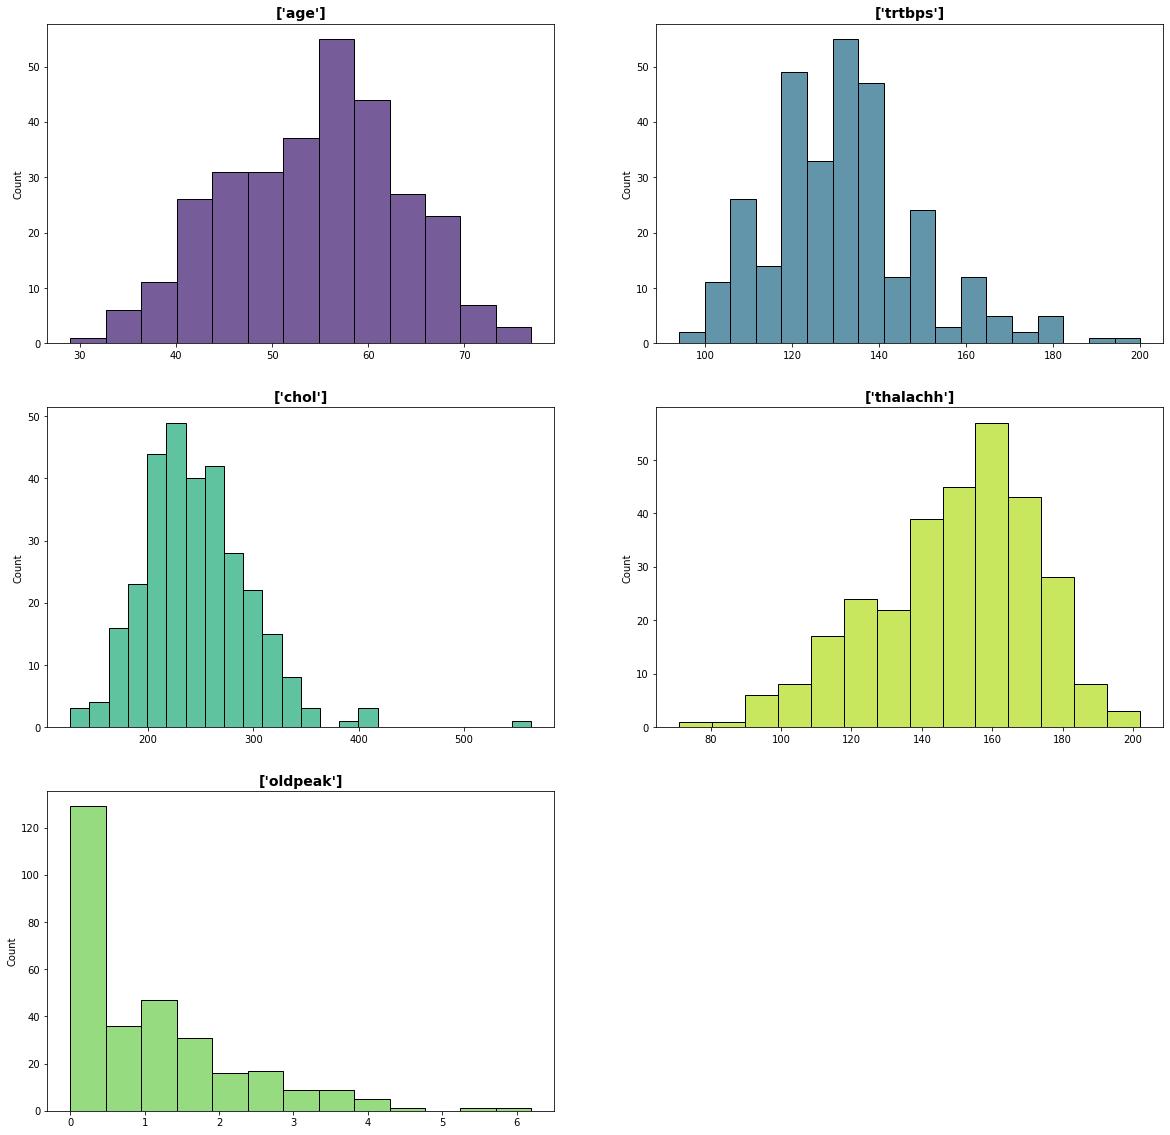

In [301]:
fig=plt.figure(figsize=(20,20))
c=1
palette = itertools.cycle(sns.color_palette(['#482677FF', '#2D708EFF',
                                             '#29AF7FFF', '#B8DE29FF', 
                                             '#73D055FF']))
for i in con_cols:
  plt.subplot(3,2,c)
  z = next(palette)
  sns.histplot(df[i].values, color=z)
  plt.title([i],fontweight="bold", fontsize = 14)
  c+=1
plt.show()

Text(0.5, 1.0, 'oldpeak')

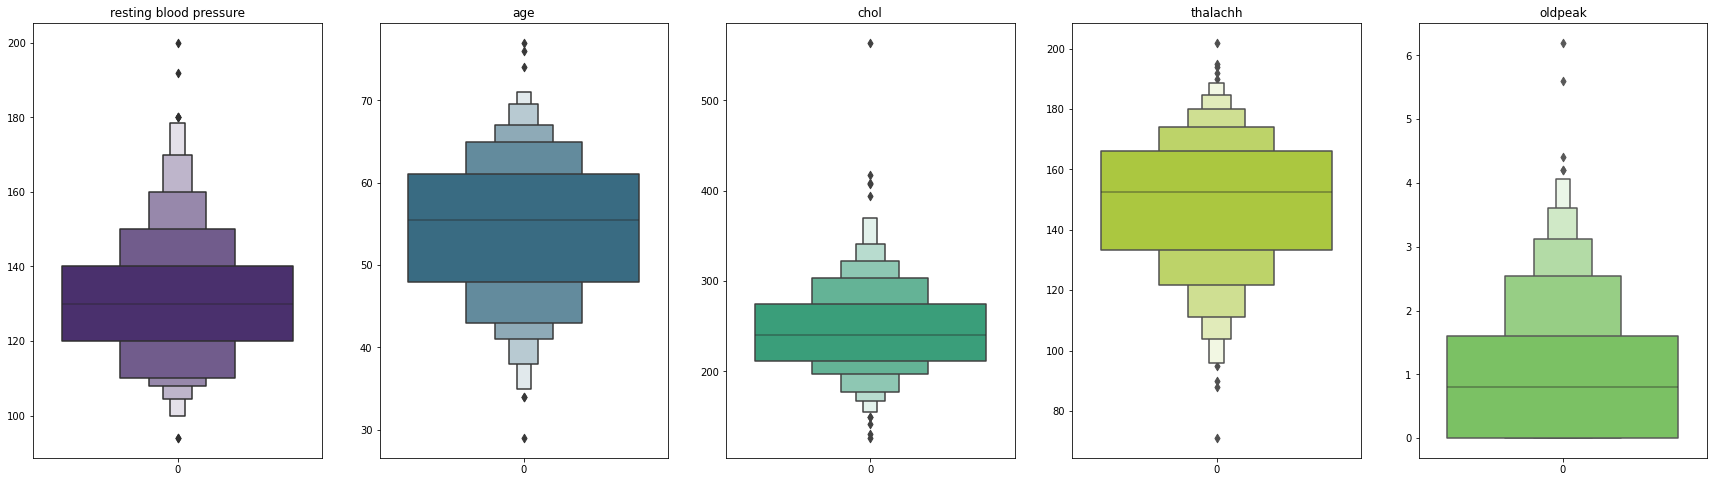

In [302]:
fig, axes = plt.subplots(1, 5, figsize=(30,8) ,sharey=False)

#trtbps
sns.boxenplot(ax=axes[0],data=df['trtbps'], color='#482677FF')
axes[0].set_title('resting blood pressure')

#age
sns.boxenplot(ax=axes[1], data=df['age'], color='#2D708EFF')
axes[1].set_title('age')

#chol
sns.boxenplot(ax=axes[2], data=df['chol'], color='#29AF7FFF')
axes[2].set_title('chol')

#thalachh
sns.boxenplot(ax=axes[3], data=df['thalachh'], color = '#B8DE29FF')
axes[3].set_title('thalachh')

#oldpeak
sns.boxenplot(ax=axes[4], data=df['oldpeak'], color='#73D055FF')
axes[4].set_title('oldpeak')



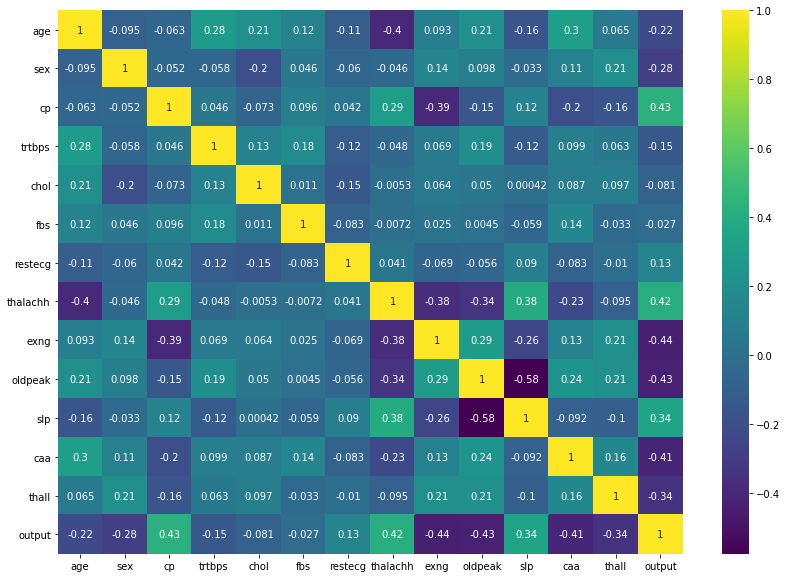

In [161]:
plt.figure(figsize=(14,10))
df_cor = df.corr().T
sns.heatmap(data=df_cor, annot=True, cmap='viridis')

In [248]:
sns.catplot(df, x="fbs", y="oldpeak", hue="output", kind="swarm")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 45.4 KB


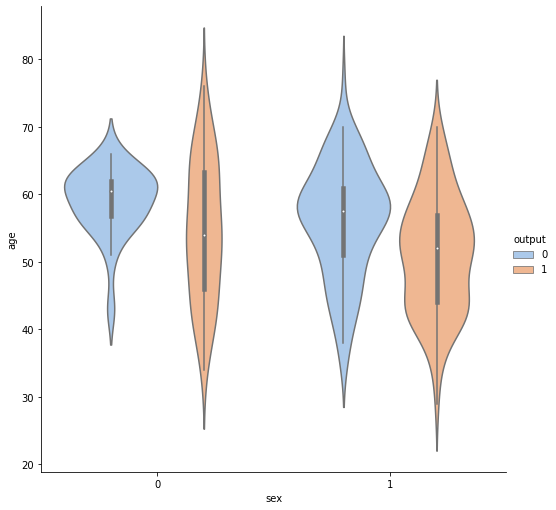

In [316]:
sns.catplot(x="sex", y="age", hue="output", kind="violin", data=df, palette='pastel',
            height=7)